In [2]:
import yfinance as yf
import numpy as np
import matplotlib as plt

In [3]:
import yfinance as yf

# Fetch historical data for Apple
data = yf.download('AAPL', start='2023-12-21', end='2024-12-21')
# path = 'apple_stock_data.csv'
# Save the data to a CSV file locally
# data.to_csv(path)

# Show the first few rows
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-12-21  193.730881  196.119189  192.556641  195.143971  46482500
2023-12-22  192.656189  194.457363  192.029255  194.228473  37122800
2023-12-26  192.108841  192.944742  191.889912  192.666108  28919300
2023-12-27  192.208359  192.556659  190.158404  191.551588  48087700
2023-12-28  192.636261  193.710998  192.228256  193.193528  34049900


/tmp/ipykernel_55172/208183452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)


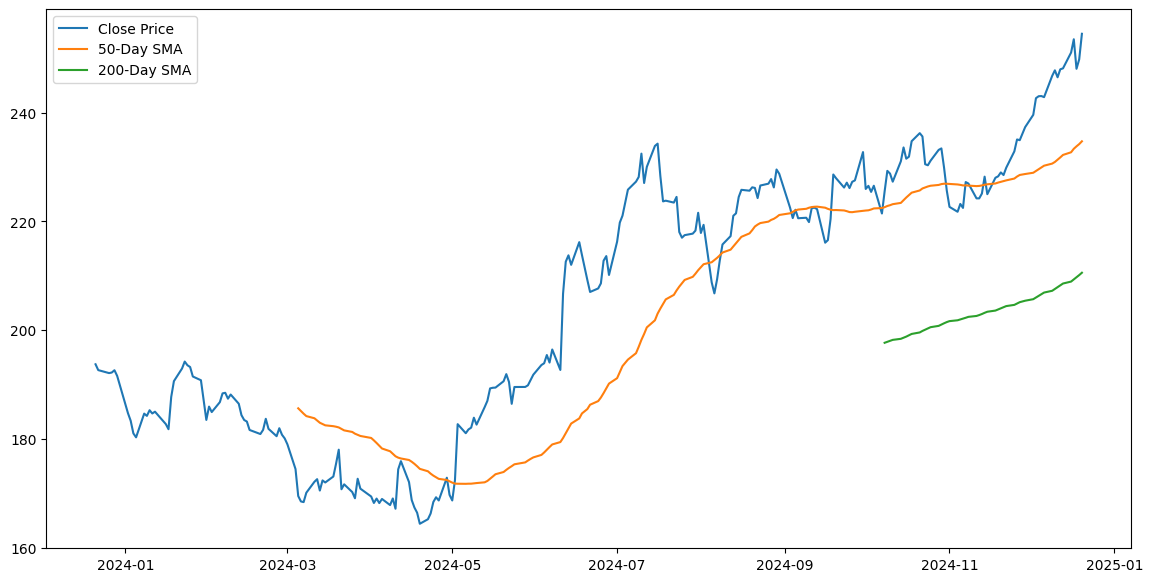

In [4]:
import pandas as pd

# Calculate moving averages
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Generate signals
data['Signal'] = 0
data['Signal'][50:] = np.where(data['SMA50'][50:] > data['SMA200'][50:], 1, -1)
data['Position'] = data['Signal'].shift()

# Plot the strategy
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA50'], label='50-Day SMA')
plt.plot(data['SMA200'], label='200-Day SMA')
plt.legend()
plt.show()

In [5]:
print(type(data))  # Should print <class 'pandas.core.frame.DataFrame'>
print(data.head())  # Check the first few rows to verify the data

<class 'pandas.core.frame.DataFrame'>
Price            Close        High         Low        Open    Volume SMA50  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL         
Date                                                                         
2023-12-21  193.730881  196.119189  192.556641  195.143971  46482500   NaN   
2023-12-22  192.656189  194.457363  192.029255  194.228473  37122800   NaN   
2023-12-26  192.108841  192.944742  191.889912  192.666108  28919300   NaN   
2023-12-27  192.208359  192.556659  190.158404  191.551588  48087700   NaN   
2023-12-28  192.636261  193.710998  192.228256  193.193528  34049900   NaN   

Price      SMA200 Signal Position  
Ticker                             
Date                               
2023-12-21    NaN      0      NaN  
2023-12-22    NaN      0      0.0  
2023-12-26    NaN      0      0.0  
2023-12-27    NaN      0      0.0  
2023-12-28    NaN      0      0.0  


In [6]:
import pandas as pd

# Check the column names
print(data.columns)

# Select relevant columns: Open, High, Low, Close, Volume
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Ensure the DataFrame is structured correctly for Backtrader
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']  # Ensure correct column names

# Check if columns are correct
print(data.head())


MultiIndex([(   'Close', 'AAPL'),
            (    'High', 'AAPL'),
            (     'Low', 'AAPL'),
            (    'Open', 'AAPL'),
            (  'Volume', 'AAPL'),
            (   'SMA50',     ''),
            (  'SMA200',     ''),
            (  'Signal',     ''),
            ('Position',     '')],
           names=['Price', 'Ticker'])
                  Open        High         Low       Close    Volume
Date                                                                
2023-12-21  195.143971  196.119189  192.556641  193.730881  46482500
2023-12-22  194.228473  194.457363  192.029255  192.656189  37122800
2023-12-26  192.666108  192.944742  191.889912  192.108841  28919300
2023-12-27  191.551588  192.556659  190.158404  192.208359  48087700
2023-12-28  193.193528  193.710998  192.228256  192.636261  34049900


In [7]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-21,195.143971,196.119189,192.556641,193.730881,46482500
2023-12-22,194.228473,194.457363,192.029255,192.656189,37122800
2023-12-26,192.666108,192.944742,191.889912,192.108841,28919300
2023-12-27,191.551588,192.556659,190.158404,192.208359,48087700
2023-12-28,193.193528,193.710998,192.228256,192.636261,34049900


In [8]:
# stock_prices = pd.read_csv(path, header=2, index_col=0, parse_dates=True)
stock_prices = data
# Check the first few rows to ensure the data is correctly parsed
print(stock_prices.head(),type(stock_prices))

                  Open        High         Low       Close    Volume
Date                                                                
2023-12-21  195.143971  196.119189  192.556641  193.730881  46482500
2023-12-22  194.228473  194.457363  192.029255  192.656189  37122800
2023-12-26  192.666108  192.944742  191.889912  192.108841  28919300
2023-12-27  191.551588  192.556659  190.158404  192.208359  48087700
2023-12-28  193.193528  193.710998  192.228256  192.636261  34049900 <class 'pandas.core.frame.DataFrame'>


In [9]:
# Rename the columns with proper names
stock_prices.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
# Ensure 'Date' is a datetime column
stock_prices['Date'] = pd.to_datetime(stock_prices.index)
stock_prices.set_index('Date', inplace=True)

# Verify that the data is now correctly indexed
print(stock_prices.head())


                 Close        High         Low        Open    Volume
Date                                                                
2023-12-21  195.143971  196.119189  192.556641  193.730881  46482500
2023-12-22  194.228473  194.457363  192.029255  192.656189  37122800
2023-12-26  192.666108  192.944742  191.889912  192.108841  28919300
2023-12-27  191.551588  192.556659  190.158404  192.208359  48087700
2023-12-28  193.193528  193.710998  192.228256  192.636261  34049900


<IPython.core.display.Javascript object>

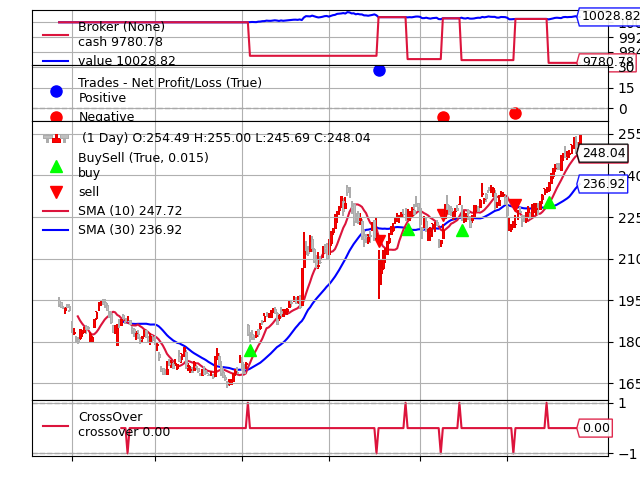

In [10]:
from datetime import datetime
import backtrader as bt
%matplotlib inline

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
feed = bt.feeds.PandasData(dataname=stock_prices)
cerebro.adddata(feed)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
# Save the plot to a file
cerebro.plot(style='candlestick', volume=False)
plt.savefig('assets/sma.png')

# Display the saved image in the notebook
from IPython.display import Image
Image(filename='assets/sma.png')
